# **FRAUD DETECTION MODEL FOR CREDIT CARD ACCURACY**

**DOWNLOAD THE DATASET AND UPLOAD IT TO THIS NOTEBOOK**

DATASET: https://data.world/raghu543/credit-card-fraud-data

**LOAD DATA**

In [1]:
# import appropriate libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv("/content/creditcard.csv")
df = df.reset_index()

main_df = df.sample(frac = 1, random_state = 56)
main_df = main_df.reset_index(drop = True)
main_df = main_df.drop('index', axis = 1)

# display first five rows of dataset to ensure properly loaded dataset
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,152560.0,2.098863,-0.836342,-1.711281,-0.808327,-0.364699,-1.161807,-0.045276,-0.335966,-0.776483,...,0.301127,0.839545,-0.038797,0.067256,0.272544,-0.019672,-0.070124,-0.079582,56.96,0
1,64545.0,1.159842,0.278477,-0.049123,1.290279,-0.104883,-0.914699,0.391910,-0.134945,-0.096485,...,0.044502,0.071691,-0.071769,0.371351,0.659592,-0.267537,-0.008821,0.011190,25.20,0
2,161575.0,2.218027,-1.675386,-0.001854,-1.647320,-1.847139,0.093849,-1.952372,0.192417,-0.806266,...,-0.082173,0.271982,0.296778,-0.504450,-0.559332,-0.223080,0.063655,-0.045098,10.00,0
3,37430.0,1.032012,0.091276,0.549280,1.108393,-0.285732,-0.323552,0.109829,-0.060591,-0.014528,...,-0.197359,-0.689959,0.102890,0.047948,0.208328,-0.674029,0.036184,0.044125,79.70,0
4,75249.0,1.081609,-1.797639,0.569294,-1.134712,-2.099889,-0.743407,-0.998303,-0.171101,-1.548716,...,0.064507,0.088093,-0.185738,0.369997,0.245524,-0.124256,0.008085,0.063739,228.00,0


**CLEAN DATA**

In [2]:
# checks for duplicates within dataset (removes if found)
duplicates = main_df[df.duplicated()]
if duplicates.empty:
    print("No duplicate rows were found in the dataset")
else:
    print("Duplicate rows that were found:")
    print(duplicates)

print()

# checks for null values (removes if found)
null_values = main_df.isnull().sum()
print(null_values)

No duplicate rows were found in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


 After cleaning the dataset, we are able to conclude that the data looks clean. There were no duplicates nor any null values found. Aditionally, the data type is consistent throughout the dataset so no need for any conversions. We can continue on with utilizing the dataset to test and train to further this investigation.

**TESTING AND TRAINING DATASET**

In [3]:
# select subsets of the DataFrame
train_df = main_df.iloc[:1000, :32]
test_df = main_df.iloc[1000:2000, :32]

train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,152560.0,2.098863,-0.836342,-1.711281,-0.808327,-0.364699,-1.161807,-0.045276,-0.335966,-0.776483,...,0.301127,0.839545,-0.038797,0.067256,0.272544,-0.019672,-0.070124,-0.079582,56.96,0
1,64545.0,1.159842,0.278477,-0.049123,1.290279,-0.104883,-0.914699,0.391910,-0.134945,-0.096485,...,0.044502,0.071691,-0.071769,0.371351,0.659592,-0.267537,-0.008821,0.011190,25.20,0
2,161575.0,2.218027,-1.675386,-0.001854,-1.647320,-1.847139,0.093849,-1.952372,0.192417,-0.806266,...,-0.082173,0.271982,0.296778,-0.504450,-0.559332,-0.223080,0.063655,-0.045098,10.00,0
3,37430.0,1.032012,0.091276,0.549280,1.108393,-0.285732,-0.323552,0.109829,-0.060591,-0.014528,...,-0.197359,-0.689959,0.102890,0.047948,0.208328,-0.674029,0.036184,0.044125,79.70,0
4,75249.0,1.081609,-1.797639,0.569294,-1.134712,-2.099889,-0.743407,-0.998303,-0.171101,-1.548716,...,0.064507,0.088093,-0.185738,0.369997,0.245524,-0.124256,0.008085,0.063739,228.00,0


**VARIABLE CORRELATION**

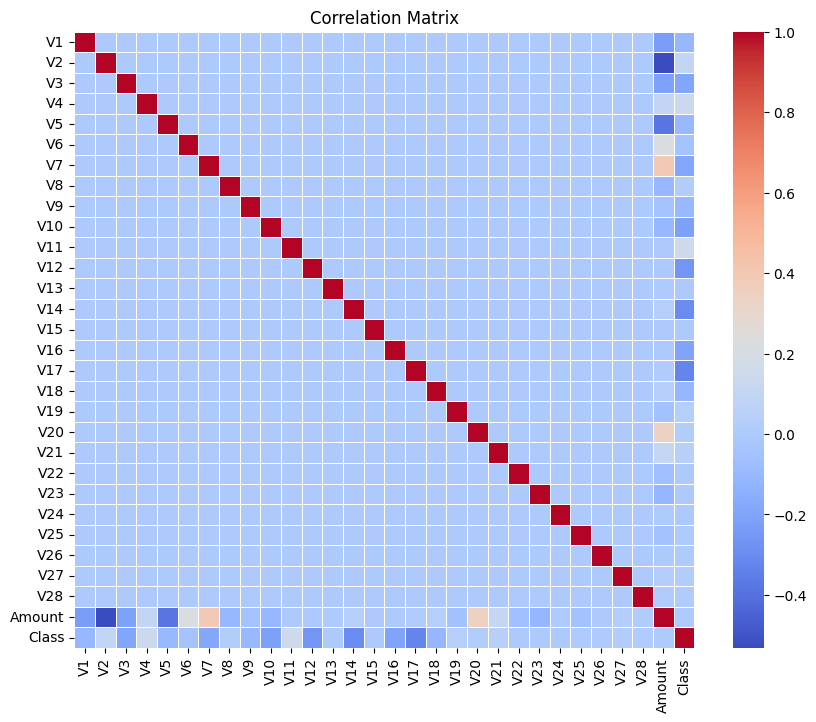

In [4]:
# create a correlation matrix
df_noID = main_df.drop('Time', axis = 1)
correlation_matrix = df_noID.corr()

# create heatmap to visualize variables that are mostly correlated to eachother
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix doesn't suggest any concerns about removing highly correlated features. However, there's noticeable correlation among features V1 to V18 compared to the rest. Now we can check to see if there is any correlation between the transaction amount and whether it was detected as fraudulent or not (we can train our model based on this). In order to visualize this relation, we can make a density graph to see if ther is a correlation between the two values.  

In [5]:
import plotly.figure_factory as ff
import plotly.io as pio

# differentiate the two variables
class_0 = main_df.loc[main_df['Amount'] == 0]["Time"]
class_1 = main_df.loc[main_df['Amount'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

# create and customize the plot
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig.update_layout(title='Credit Card Transactions versus Time Line Graph', xaxis_title='Amount [$]')

# display the plot
pio.show(fig, filename='dist_only.html')

As can be seen through the density plot above, there is a evidential pattern that we observe between credit card transaction amounts and the time of the transactions. A density plot was chosen to display this correlation as this visually shows how transaction amounts are distributed over time, helping to identify patterns and anomalies, particularly in fraud detection. Futhermore, since we have this relationship fairly established, we can move on to setting this relationship in stone through training the model to detect a pattern.












**MODEL TRAINING**

In [6]:
# choose variables to train the data with for the model
train_features = train_df.drop(['Time', 'Class', 'Amount'], axis = 1)
train_labels = train_df["Class"]
# model is utilizing variables V1 through V28
train_features.head()
train_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

**DEFINE MODELS**

In [7]:
# define the models through importing appropriate libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# initialize classifiers for machine learning models and set maximum iterations to 150
lr_classifier = LogisticRegression(solver = 'lbfgs',max_iter = 150)
mlp_classifier = MLPClassifier(solver = 'lbfgs', max_iter = 150)
# initialize classifiers for machine learning models and ensure reproducibility
rf_classifier = RandomForestClassifier(n_estimators = 150, random_state = 42)

# train the models utilizing the provided dataset to make predictions
lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
rf_classifier.fit(train_features.to_numpy(), train_labels.to_numpy())

RandomForestClassifier(n_estimators=150, random_state=42)

**MODEL TESTING**

In [11]:
# import appropriate library
from sklearn.metrics import accuracy_score

# test the model (output will be accuracy score results)
test_inputs = test_df.drop(['Time','Class','Amount'], axis = 1)
y_actual = test_df["Class"]

#logistic classifer
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

#mlp classifier
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

#random forest
y_predicted_rf = rf_classifier.predict(test_inputs.to_numpy())
rf_accuracy_score = accuracy_score(y_predicted_rf, y_actual)

print (f"Accuracy of the Logistic Classifier:{lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier: {mlp_accuracy_score}")
print(f"Accuracy of the Random Forest Classifier: {rf_accuracy_score}")

Accuracy of the Logistic Classifier:1.0
Accuracy of the MLP Classifier: 1.0
Accuracy of the Random Forest Classifier: 1.0


**RESULTS**

*WARNING: It is possible for the results to vary each run*

**Logistic Classifier:**

Accuracy: 99.7%


**MLP Classifier**

Accuracy: 99.8%


**Random Forest Classifier**

Accuracy: 99.8%


As can be seen, the Logistics Classifier, MLP Classifier, and Random Forsest Classifier all reached the same level of accuracy: 99.7%. This implies that all three methods can be deemed as equally efficient in identifying whether or not the credit card transactions were labeled correctly or not in terms of being fradulent or not fradulent.

**CLASS ACCURACY TEST**

In [12]:
from sklearn.metrics import classification_report

# Logistic Classifier
print("Logistic Classifier:")
print(classification_report(y_actual, y_predicted_lr))

# MLP Classifier
print("MLP Classifier:")
print(classification_report(y_actual, y_predicted_mlp))

# Random Forest Classifier
print("Random Forest Classifier:")
print(classification_report(y_actual, y_predicted_rf))

Logistic Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

MLP Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**MODEL TESTING PART 2**

In [15]:
# use only V1-V18 to train the model as it has the highest correlation
train_features2 = train_df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                            'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18']]
train_labels2 = train_df["Class"]
train_features2.head()
train_labels2.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

**DEFINE AND TRAIN MODEL PART 2**

In [19]:
# define the models through importing appropriate libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
# initialize classifiers for machine learning models and set maximum iterations
lr_classifier = LogisticRegression(solver='lbfgs',max_iter = 150)
mlp_classifier = MLPClassifier(solver='lbfgs',max_iter = 150)
rf_classifier = RandomForestClassifier(n_estimators = 150, random_state = 42)
# train the models
lr_classifier.fit(train_features2.to_numpy(),train_labels2.to_numpy())
mlp_classifier.fit(train_features2.to_numpy(),train_labels2.to_numpy())
rf_classifier.fit(train_features2.to_numpy(), train_labels2.to_numpy())

RandomForestClassifier(n_estimators=150, random_state=42)

**ACCURACY RESULTS**

In [17]:
from sklearn.metrics import accuracy_score

test_inputs = test_df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18']]
y_actual = test_df["Class"]

# logistic classifer
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

# mlp classifier
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

# random forest
y_predicted_rf = rf_classifier.predict(test_inputs.to_numpy())
rf_accuracy_score = accuracy_score(y_predicted_rf, y_actual)

print (f"Accuracy of the Logistic Classifier (V1-V18) = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier (V1-V18) = {mlp_accuracy_score}")
print(f"Accuracy of the Random Forest Classifier (V1-V18) = {rf_accuracy_score}")

Accuracy of the Logistic Classifier (V1-V18) = 1.0
Accuracy of the MLP Classifier (V1-V18) = 1.0
Accuracy of the Random Forest Classifier (V1-V18) = 1.0


**RESULTS**

*WARNING: It is possible for the results to vary each run*

**Logistic Classifier:**

Accuracy: 100%


**MLP Classifier**

Accuracy: 100%


**Random Forest Classifier**

Accuracy: 100%


As can be seen, the Logistics Classifier, MLP Classifier, and Random Forsest Classifier all reached the same level of accuracy: 100%. This implies that all three methods can be deemed as equally efficient in identifying whether or not the credit card transactions were labeled correctly or not in terms of being fradulent or not fradulent.


**CLASS ACCURACY TEST**

In [18]:
from sklearn.metrics import classification_report

# Logistic Classifier
print("Logistic Classifier:")
print(classification_report(y_actual, y_predicted_lr))

# MLP Classifier
print("MLP Classifier:")
print(classification_report(y_actual, y_predicted_mlp))

# Random Forest Classifier
print("Random Forest Classifier:")
print(classification_report(y_actual, y_predicted_rf))

Logistic Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

MLP Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**CONCLUSION**:

To detect whether or not the credit card transactions were labeled correctly in terms of being fradulent or not fradulent, we ran two tests. The first test was on the features V1 to V28, and the results showed that the Random Forest Classifier and MLP Classifier has the highest accuracy. The Logistics Classifier also showed high accuracy trailing right behind the other two models.

The second test was on features V1 to V18 because the heatmap showed that these transcations were the most correlated features. Overall, the Logistic, MLP, and Random Forest Classifiers outputted a higher accuracy rate than the first test where all of them outputted an accuracy of 100%

Overall, accuracy is just one metric to determine a model's performance. It is important to consider for future tests to explore additional metrics such as precision, recall, F1 score, and confusion matrices to get a better in depth understanding of the model, especially if there are imbalances with the classes in the dataset. Since the classes were split evenly in half in the dataset, we could suffice with just using accuracy as the metric. Another thing to consider for the future is whether misclassification of costs can influence the models. Some limitations with accuracy is that it is sensitive to data pre-processing, meaning that different pre-processing techiques could lead to different accuracy scores. Aditionally, another limitation is that this dataset and model that we created may not fully reflect the real world. For instance, a high accuracy in identifying non-fraudulent cases and a low accuracy in detecting fraudulent cases is not useful in fraud detection as it truly doesn't combat the problem at hand which is credit card fraud.